<a href="https://colab.research.google.com/github/dwonn201/KaggleStudy/blob/master/NYC_AirBnB_Dataset/2019_NYC_AirBnB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오
----------
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 데이터 소개
    - 이번 주제는 Kaggle 내 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID  (listing ID)
    name: 항목의 이름 (타이틀) (name of the listing)
    host_id: 호스트 ID  (host ID)
    host_name: 호스트의 이름  (name of the host)
    neighbourhood_group:방이 있는 지역 그룹 (location)
    neighbourhood: 방이 있는 지역 (area)
    latitude: 방이 위치한 위도 (latitude coordinates)
    longitude: 방이 위치한 경도 (longitude coordinates)
    room_type: 방의 종류 (listing space type)
    price: 가격 (미 달러) (price in dollars)
    minimum_nights:최소 숙박 일수 (amount of nights minimum)
    number_of_reviews: 리뷰의 개수  (number of reviews)
    last_review: 마지막 리뷰 일자 (latest review)
    reviews_per_month: 월별 리뷰 개수 (number of reviews per month)
    calculated_host_listings_count: 호스트가 올린 방 개수  (amount of listing per host)
    availability_365: 365일 중 가능한 일수 (number of days when listing is available for booking)

---

## Step 1. 데이터셋 준비하기

### 1. Colab Notebook에 Kaggle API 세팅


In [1]:
import os

# os.environ을 이용하여 Kaggle API Username, Key 세팅
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = '' 


### 2. 데이터 다운로드 및 압축 해제

In [2]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드 및 압축 해제
!rm *.*
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 78.4MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


### 3. data 불러오기


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("AB_NYC_2019.csv")

In [5]:
print(data.shape)
data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
print(data.shape[0], data['id'].nunique(), data['host_id'].nunique())

48895 48895 37457


In [9]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
data[data['last_review'].isna()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


last_review가 null 이면 reviews_per_month도 null 값을 가지고 있는것으로 보임

In [11]:
((data['last_review'].isna()) & (data['reviews_per_month'].isna())).sum()

10052

review가 한번도 달린적이 없다면 'last_review' 와 'reviews_per_month' null 값을 가짐

In [12]:
df = data.copy()

In [13]:
print(df.shape, data.shape)
df.head()

(48895, 16) (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Step 2. EDA 및 데이터 기초 통계 분석


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### 4. 범주형 데이터 분석


In [16]:
cat_cols = df[['neighbourhood_group', 'neighbourhood','room_type']]

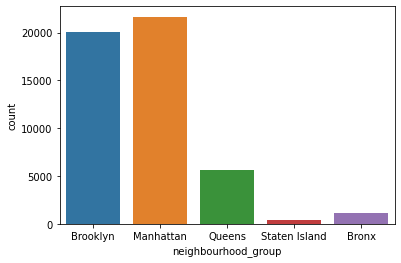

In [17]:
sns.countplot(x = 'neighbourhood_group', data = df)

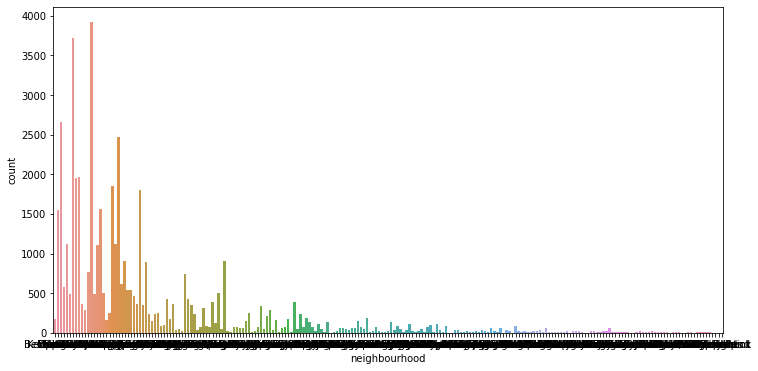

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'neighbourhood', data = df)

In [19]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [20]:
a = df['neighbourhood_group'] +"_"+ df['neighbourhood']
a.value_counts()[:30]

Brooklyn_Williamsburg                 3920
Brooklyn_Bedford-Stuyvesant           3714
Manhattan_Harlem                      2658
Brooklyn_Bushwick                     2465
Manhattan_Upper West Side             1971
Manhattan_Hell's Kitchen              1958
Manhattan_East Village                1853
Manhattan_Upper East Side             1798
Brooklyn_Crown Heights                1564
Manhattan_Midtown                     1545
Manhattan_East Harlem                 1117
Brooklyn_Greenpoint                   1115
Manhattan_Chelsea                     1113
Manhattan_Lower East Side              911
Queens_Astoria                         900
Manhattan_Washington Heights           899
Manhattan_West Village                 768
Manhattan_Financial District           744
Brooklyn_Flatbush                      621
Brooklyn_Clinton Hill                  572
Queens_Long Island City                537
Brooklyn_Prospect-Lefferts Gardens     535
Brooklyn_Park Slope                    506
Brooklyn_Ea

상위 30개 지역이 모두 Brooklyn, Manhattan, Queens 지역임

neighbourhood_group만 사용하거나 neighbourhood 정제 후 사용

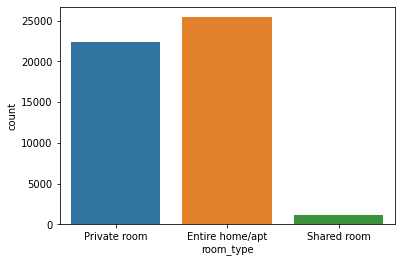

In [21]:
sns.countplot(x = 'room_type', data = df)

### 5. 수치형 데이터 분석

In [22]:
num_cols = df[['price','minimum_nights','number_of_reviews','last_review',
            'reviews_per_month','calculated_host_listings_count','availability_365']]

(array([2.1877e+04, 1.7233e+04, 5.8670e+03, 1.9300e+03, 7.5300e+02,
        3.7600e+02, 2.2300e+02, 1.6200e+02, 1.0100e+02, 7.5000e+01,
        7.1000e+01, 2.0000e+01, 2.3000e+01, 1.1000e+01, 8.0000e+00,
        2.9000e+01, 5.0000e+00, 1.2000e+01, 4.0000e+00, 5.0000e+00,
        2.5000e+01, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.3000e+01, 3.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00,
        8.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

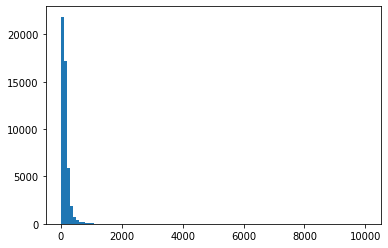

In [23]:
plt.hist(x = 'price', bins = 100, data = num_cols)

(array([4.2433e+04, 1.3790e+03, 4.5640e+03, 6.6000e+01, 1.2400e+02,
        1.5000e+01, 1.3000e+01, 1.2700e+02, 5.0000e+00, 3.2000e+01,
        3.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00, 5.0000e+01,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 3.2000e+01,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

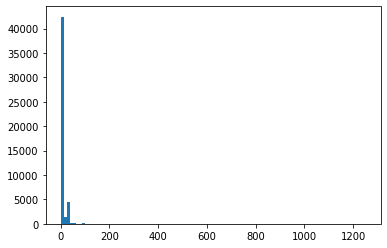

In [24]:
plt.hist(x = 'minimum_nights', bins = 100, data = num_cols)

(array([1.2720e+04, 1.1696e+04, 7.9990e+03, 3.3030e+03, 3.0340e+03,
        7.5200e+02, 2.0580e+03, 1.3000e+02, 8.0000e+01, 4.8300e+02,
        3.3000e+01, 9.1000e+01, 5.4000e+01, 5.6200e+02, 2.7900e+02,
        1.8000e+01, 1.4000e+01, 2.8000e+01, 8.0000e+00, 0.0000e+00,
        2.2300e+02, 1.3500e+02, 8.0000e+00, 8.0000e+00, 1.4000e+01,
        8.2000e+01, 1.6000e+01, 1.7000e+01, 2.0300e+02, 3.4000e+02,
        3.7600e+03, 2.0100e+02, 8.0000e+00, 2.0000e+00, 0.0000e+00,
        1.5000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  , 20.95, 21.9 , 22.85, 23.8 , 24.75, 25.7 ,
        26.65, 27.6 , 28.55, 29.5 , 30.45, 31.4 , 32.35, 33.3 , 34.25,
        35.2 , 36.15, 37.1 , 38.05, 39.  ]),
 <a list of 40 Patch objects>)

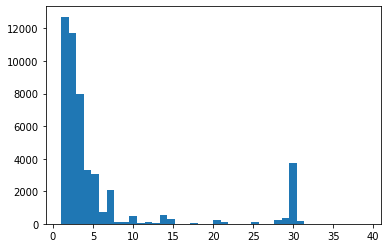

In [25]:
min_night = num_cols[num_cols['minimum_nights']<40]
plt.hist(x = 'minimum_nights', bins = 40, data = min_night)

In [26]:
min_nigts = pd.DataFrame(num_cols['minimum_nights'].value_counts()).reset_index().rename(columns = {'index':'minimum_nights', 'minimum_nights' : 'cnts'}).sort_values('minimum_nights', ascending=True)
tot_min_nigts = sum(min_nigts['cnts'])
min_nigts['ratio'] = min_nigts['cnts'] / tot_min_nigts

cum_r = []
cr = 0

for i in min_nigts['ratio']:
  cr += i
  cum_r.append(cr)

min_nigts['cum_ratio'] = cum_r


min_nigts.head(30)

,minimum_nights,cnts,ratio,cum_ratio
0,1,12720,0.260149,0.260149
1,2,11696,0.239206,0.499356
2,3,7999,0.163595,0.662951
4,4,3303,0.067553,0.730504
5,5,3034,0.062051,0.792555
7,6,752,0.015380,0.807935
6,7,2058,0.042090,0.850026
16,8,130,0.002659,0.852684
21,9,80,0.001636,0.854320
9,10,483,0.009878,0.864199


최소 숙박 일수는 1일에 가장 많고, 2일 이하가 50%.   
30일 이하가 약 98.5%.
즉 한달 넘는 장기 투숙자들은 1.5%에 불과함.  
binning을 통한 최소 숙박 일수 grouping 필요할것으로 보임

(array([1.7991e+04, 6.1500e+03, 3.4210e+03, 2.9750e+03, 2.2770e+03,
        1.8620e+03, 1.3710e+03, 9.0500e+02, 6.4800e+02, 3.7800e+02,
        2.6900e+02, 1.6600e+02, 1.2800e+02, 8.4000e+01, 5.1000e+01,
        4.6000e+01, 3.1000e+01, 2.5000e+01, 1.4000e+01, 1.1000e+01,
        1.0000e+01, 2.0000e+00, 1.1000e+01, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

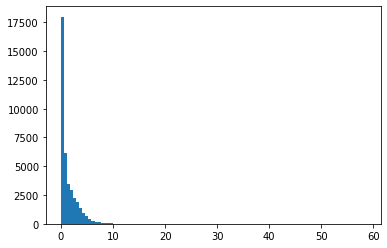

In [27]:
plt.hist(x = 'reviews_per_month', bins = 100, data = num_cols)

In [28]:
rpm = pd.DataFrame(num_cols['reviews_per_month'].fillna(0.0).value_counts()).reset_index().rename(columns = {'index':'reviews_per_month', 'reviews_per_month' : 'cnts'}).sort_values('reviews_per_month', ascending=True)
tot_rpm = sum(rpm['cnts'])
rpm['ratio'] = rpm['cnts'] / tot_rpm
cum_r = []
cr = 0

for i in rpm['ratio']:
  cr += i
  cum_r.append(cr)

rpm['cum_ratio'] = cum_r

rpm50 = rpm[rpm['cum_ratio'] >= 0.50]['reviews_per_month'].min()
rpm90 = rpm[rpm['cum_ratio'] >= 0.90]['reviews_per_month'].min()
rpm95 = rpm[rpm['cum_ratio'] >= 0.95]['reviews_per_month'].min()
rpm99 = rpm[rpm['cum_ratio'] >= 0.99]['reviews_per_month'].min()

print(rpm50, rpm90, rpm95, rpm99)

0.37 3.25 4.31 6.8


월별 약 50%가 0.37회 리뷰가 달리며, 상위 10%가 월 평균 3.25회, 상위5%가 4.31회, 상위1%가 6.8회 리뷰가 달림.

In [29]:
host_list_cnts = pd.DataFrame(num_cols['calculated_host_listings_count'].fillna(0.0).value_counts()).reset_index().rename(columns = {'index':'calculated_host_listings_count', 'calculated_host_listings_count' : 'cnts'}).sort_values('calculated_host_listings_count', ascending=True)
tot_host_list_cnts = sum(host_list_cnts['cnts'])
host_list_cnts['ratio'] = host_list_cnts['cnts'] / tot_host_list_cnts
cum_r = []
cr = 0

for i in host_list_cnts['ratio']:
  cr += i
  cum_r.append(cr)

host_list_cnts['cum_ratio'] = cum_r

host_list_cnts50 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.50]['calculated_host_listings_count'].min()
host_list_cnts90 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.90]['calculated_host_listings_count'].min()
host_list_cnts95 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.95]['calculated_host_listings_count'].min()
host_list_cnts99 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.99]['calculated_host_listings_count'].min()

print(host_list_cnts50, host_list_cnts90, host_list_cnts95, host_list_cnts99)
host_list_cnts

1 5 15 232


,calculated_host_listings_count,cnts,ratio,cum_ratio
0,1,32303,0.660661,0.660661
1,2,6658,0.136169,0.796830
2,3,2853,0.058350,0.855179
3,4,1440,0.029451,0.884630
4,5,845,0.017282,0.901912
5,6,570,0.011658,0.913570
7,7,399,0.008160,0.921730
6,8,416,0.008508,0.930238
9,9,234,0.004786,0.935024
11,10,210,0.004295,0.939319


전체 66% 호스트가 1인 1개 방을 등록하며, 상위 10%가 5개, 상위 5%가 15개 상위 1%가 232개 방을 등록함

In [30]:
avilability = pd.DataFrame(num_cols['availability_365'].fillna(0.0).value_counts()).reset_index().rename(columns = {'index':'availability_365', 'availability_365' : 'cnts'}).sort_values('availability_365', ascending=True)
tot_avilability = sum(avilability['cnts'])
avilability['ratio'] = avilability['cnts'] / tot_avilability
cum_r = []
cr = 0

for i in avilability['ratio']:
  cr += i
  cum_r.append(cr)

avilability['cum_ratio'] = cum_r

avilability50 = avilability[avilability['cum_ratio'] >= 0.50]['availability_365'].min()
avilability90 = avilability[avilability['cum_ratio'] >= 0.90]['availability_365'].min()
avilability95 = avilability[avilability['cum_ratio'] >= 0.95]['availability_365'].min()
avilability99 = avilability[avilability['cum_ratio'] >= 0.99]['availability_365'].min()

print(avilability50, avilability90, avilability95, avilability99)
avilability.head()

45 337 359 365


,availability_365,cnts,ratio,cum_ratio
0,0,17533,0.358585,0.358585
3,1,408,0.008344,0.366929
9,2,270,0.005522,0.372451
6,3,306,0.006258,0.378709
13,4,233,0.004765,0.383475


1년 365일 중 약 45일 활용 가능 일수의 방이 전체의 50%정도이며, 

상위 10%가 337일(연간 약 92%)    
상위 5%가 359일(연간 약 98%)  
상위 1%가 365일(연간 100%)   
활용 가능함.

In [58]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           48895 non-null  int64  
 1   minimum_nights                  48895 non-null  int64  
 2   number_of_reviews               48895 non-null  int64  
 3   last_review                     38843 non-null  object 
 4   reviews_per_month               38843 non-null  float64
 5   calculated_host_listings_count  48895 non-null  int64  
 6   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.6+ MB


In [60]:
num_cols['last_review'] = pd.to_datetime(num_cols['last_review'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   price                           48895 non-null  int64         
 1   minimum_nights                  48895 non-null  int64         
 2   number_of_reviews               48895 non-null  int64         
 3   last_review                     38843 non-null  datetime64[ns]
 4   reviews_per_month               38843 non-null  float64       
 5   calculated_host_listings_count  48895 non-null  int64         
 6   availability_365                48895 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 2.6 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
max(num_cols['last_review']), min(num_cols['last_review'])

(Timestamp('2019-07-08 00:00:00'), Timestamp('2011-03-28 00:00:00'))

In [68]:
# 2019년 dataset이기 때문에 2020년 1월 1일기준 가장 마지막 review와 얼마나 차이가 있는지 일수 차이 컬럼 생성
# 리뷰가 한건도 없는 경우 -999로 설정

from datetime import datetime
date_format = "%Y-%m-%d"
a = datetime.strptime('2020-01-01', date_format)

num_cols['last_review_day_cnts'] = a - num_cols['last_review'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [69]:
num_cols[['last_review','last_review_day_cnts']]

,last_review,last_review_day_cnts
0,2018-10-19,439 days
1,2019-05-21,225 days
2,NaT,-999 days
3,2019-07-05,180 days
4,2018-11-19,408 days
...,...,...
48890,NaT,-999 days
48891,NaT,-999 days
48892,NaT,-999 days
48893,NaT,-999 days


In [70]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   price                           48895 non-null  int64          
 1   minimum_nights                  48895 non-null  int64          
 2   number_of_reviews               48895 non-null  int64          
 3   last_review                     38843 non-null  datetime64[ns] 
 4   reviews_per_month               38843 non-null  float64        
 5   calculated_host_listings_count  48895 non-null  int64          
 6   availability_365                48895 non-null  int64          
 7   last_review_day_cnts            48895 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), timedelta64[ns](1)
memory usage: 3.0 MB


In [78]:
num_cols['last_review_day_cnts'] = num_cols['last_review_day_cnts'].dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
num_cols['last_review_day_cnts']

0        439
1        225
2       -999
3        180
4        408
        ... 
48890   -999
48891   -999
48892   -999
48893   -999
48894   -999
Name: last_review_day_cnts, Length: 48895, dtype: int64

In [80]:
num_cols[['last_review','last_review_day_cnts']]

,last_review,last_review_day_cnts
0,2018-10-19,439
1,2019-05-21,225
2,NaT,-999
3,2019-07-05,180
4,2018-11-19,408
...,...,...
48890,NaT,-999
48891,NaT,-999
48892,NaT,-999
48893,NaT,-999


In [85]:
day_cnts = pd.DataFrame(num_cols['last_review_day_cnts'].value_counts()).reset_index().rename(columns = {'index':'last_review_day_cnts', 'last_review_day_cnts' : 'cnts'}).sort_values('last_review_day_cnts', ascending=True)
tot_day_cnts = sum(day_cnts['cnts'])
day_cnts['ratio'] = day_cnts['cnts'] / tot_day_cnts
cum_r = []
cr = 0

for i in day_cnts['ratio']:
  cr += i
  cum_r.append(cr)

day_cnts['cum_ratio'] = cum_r

day_cnts50 = day_cnts[day_cnts['cum_ratio'] >= 0.50]['last_review_day_cnts'].min()
day_cnts90 = day_cnts[day_cnts['cum_ratio'] >= 0.90]['last_review_day_cnts'].min()
day_cnts95 = day_cnts[day_cnts['cum_ratio'] >= 0.95]['last_review_day_cnts'].min()
day_cnts99 = day_cnts[day_cnts['cum_ratio'] >= 0.99]['last_review_day_cnts'].min()

print(day_cnts50, day_cnts90, day_cnts95, day_cnts99)
day_cnts.head()

201 1010 1326 1670


,last_review_day_cnts,cnts,ratio,cum_ratio
0,-999,10052,0.205583,0.205583
67,177,89,0.001820,0.207404
5,178,718,0.014685,0.222088
10,179,565,0.011555,0.233644
9,180,580,0.011862,0.245506


In [87]:
notnull = num_cols[num_cols['last_review_day_cnts'] >= 0]
day_cnts = pd.DataFrame(notnull['last_review_day_cnts'].value_counts()).reset_index().rename(columns = {'index':'last_review_day_cnts', 'last_review_day_cnts' : 'cnts'}).sort_values('last_review_day_cnts', ascending=True)
tot_day_cnts = sum(day_cnts['cnts'])
day_cnts['ratio'] = day_cnts['cnts'] / tot_day_cnts
cum_r = []
cr = 0

for i in day_cnts['ratio']:
  cr += i
  cum_r.append(cr)

day_cnts['cum_ratio'] = cum_r

day_cnts50 = day_cnts[day_cnts['cum_ratio'] >= 0.50]['last_review_day_cnts'].min()
day_cnts90 = day_cnts[day_cnts['cum_ratio'] >= 0.90]['last_review_day_cnts'].min()
day_cnts95 = day_cnts[day_cnts['cum_ratio'] >= 0.95]['last_review_day_cnts'].min()
day_cnts99 = day_cnts[day_cnts['cum_ratio'] >= 0.99]['last_review_day_cnts'].min()

print(day_cnts50, day_cnts90, day_cnts95, day_cnts99)
day_cnts

227 1172 1454 1726


,last_review_day_cnts,cnts,ratio,cum_ratio
65,177,89,0.002291,0.002291
4,178,718,0.018485,0.020776
9,179,565,0.014546,0.035322
8,180,580,0.014932,0.050254
25,181,330,0.008496,0.058749
...,...,...,...,...
1594,3026,1,0.000026,0.999897
1576,3027,1,0.000026,0.999923
1702,3156,1,0.000026,0.999949
1534,3173,1,0.000026,0.999974


### 6. 범주형 데이터와 Price간 관계 분석

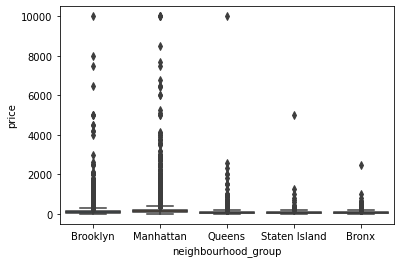

In [31]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df)

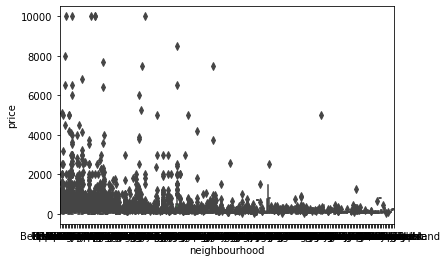

In [32]:
sns.boxplot(x = 'neighbourhood', y = 'price', data = df)

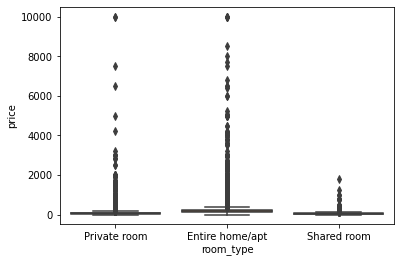

In [33]:
sns.boxplot(x = 'room_type', y = 'price', data = df)

### 7. 수치형 데이터와 Price 간 관계 분석

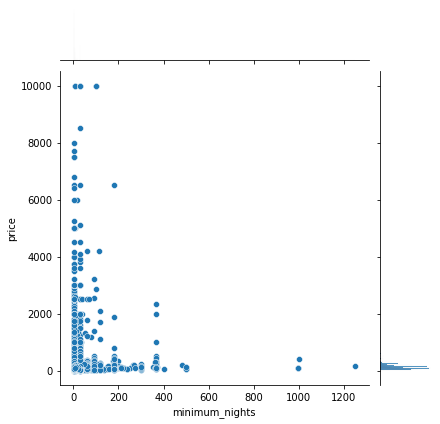

In [34]:
sns.jointplot(x='minimum_nights', y='price', data = df, kind = 'scatter')

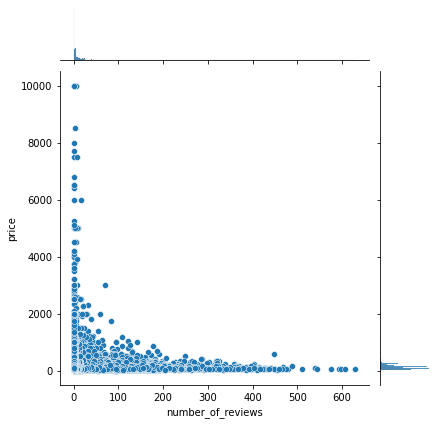

In [35]:
sns.jointplot(x='number_of_reviews', y='price', data = df, kind = 'scatter')

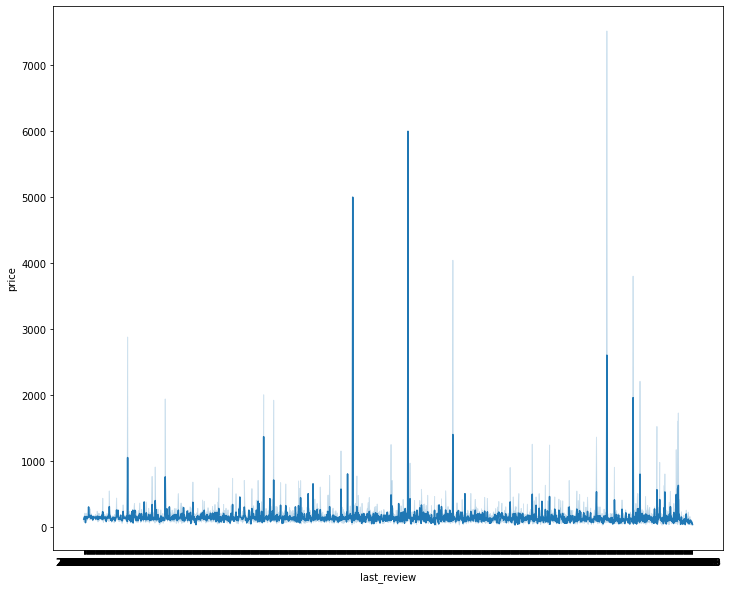

In [36]:
plt.figure(figsize=(12,10))
sns.lineplot(x='last_review', y ='price', data = df)

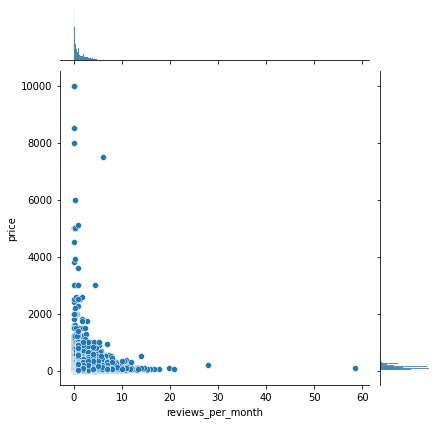

In [37]:
sns.jointplot(x='reviews_per_month', y='price', data = df, kind = 'scatter')

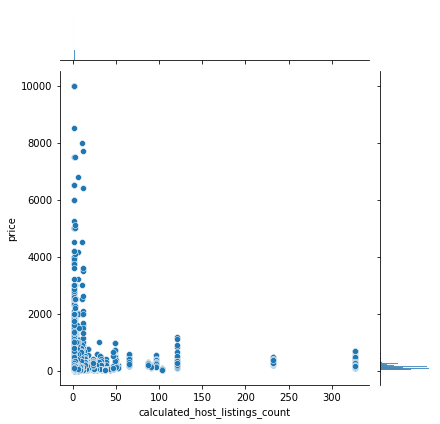

In [43]:
sns.jointplot(x='calculated_host_listings_count', y='price', data = df, kind = 'scatter')

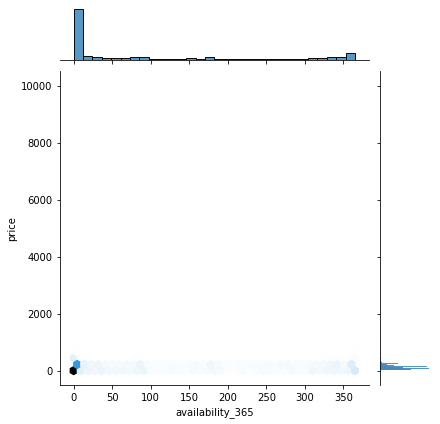

In [45]:
sns.jointplot(x='availability_365', y='price', data = df, kind = 'hex')

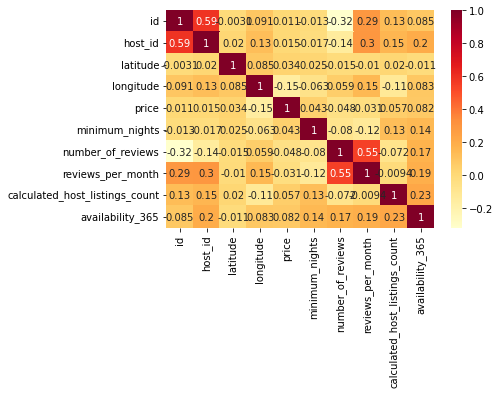

In [42]:
# corr 
sns.heatmap(df.corr(), annot=True, cmap ='YlOrRd')

### 6. 불필요한 데이터 데이터프레임에서 제거하기


In [38]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [39]:
# 불필요컬럼 제거
unneccessary_columns = [
                        'id',                                 #  항목의 ID  (listing ID)
                        'name',                               #  항목의 이름 (타이틀) (name of the listing)
                        'host_id',                            #  호스트 ID  (host ID)
                        'host_name',                          #  호스트의 이름  (name of the host)
                        #'neighbourhood_group',                #  방이 있는 지역 그룹 (location)
                        'neighbourhood',                      #  방이 있는 지역 (area)
                        'latitude',                           #  방이 위치한 위도 (latitude coordinates)
                        'longitude',                          #  방이 위치한 경도 (longitude coordinates)
                        #'room_type',                          #  방의 종류 (listing space type)
                        #'price',                              #  가격 (미 달러) (price in dollars)
                        #'minimum_nights',                     #  최소 숙박 일수 (amount of nights minimum)
                        #'number_of_reviews',                  #  리뷰의 개수  (number of reviews)
                        #'last_review',                        #  마지막 리뷰 일자 (latest review)
                        #'reviews_per_month',                  #  월별 리뷰 개수 (number of reviews per month)
                        #'calculated_host_listings_count',     #  호스트가 올린 방 개수  (amount of listing per host)
                        #'availability_365'                    #  365일 중 가능한 일수 (number of days when listing is available for booking)
                        ]

### 7. 수치형 데이터 클리닝

### 8. 범주형 데이터 클리닝